In [1]:
# importing required libraries
import os
import pandas as pd
import random
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings

In [2]:
# reading data file
os.getcwd()
os.chdir('/Users/riyagoyal/downloads/data')
os.getcwd()
main_file_path = 'train.csv' 
data = pd.read_csv(main_file_path, low_memory=False)

In [3]:
# Load the dataset
df = pd.read_csv('train.csv')


In [4]:
# Display the first few rows of the dataset
print(df.head())

   property_id                                    property_name  \
0            1                    Chambre à louer,courte durée.   
1            2  Urban Antwerp - Spacious & Authentic Herenhouse   
2            3   comfortable apartment in friendly neighborhood   
3            4                         Historical City Antwerp.   
4            5                              Antwerp center city   

                                    property_summary  \
0  Je loue une chambre dans mon appartement "atyp...   
1  Our place is a typical historic herenhuis clos...   
2  Nice and cozy apartment for couples who like t...   
3  The best place to stay if you like to be in th...   
4  Our place is right in the heart of the histori...   

                                      property_space  \
0  Espace duplex très grand et lumineux,la chambr...   
1  The spaces in our house are all large with hig...   
2  Nice proper and clean apartment. No personal s...   
3  Our rooms are nice and spacious. 

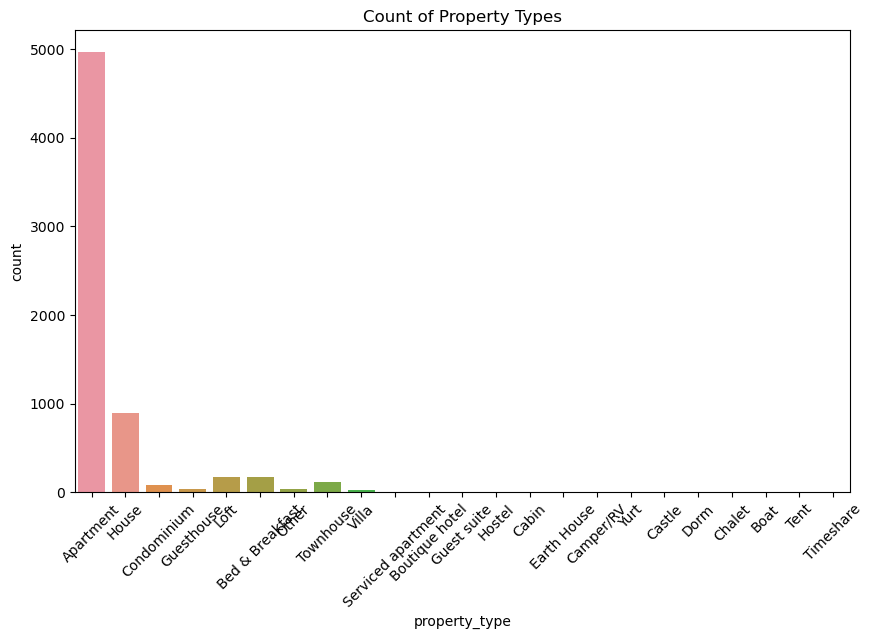

In [5]:
# Count of property types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='property_type')
plt.xticks(rotation=45)
plt.title('Count of Property Types')
plt.show()


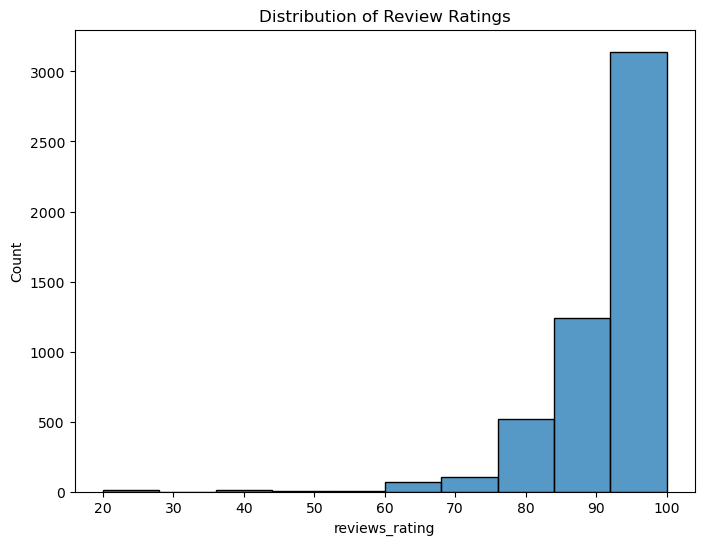

In [6]:
#Distribution of review Rating
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='reviews_rating', bins=10)
plt.title('Distribution of Review Ratings')
plt.show()

/Users/riyagoyal/anaconda3/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/riyagoyal/anaconda3/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/riyagoyal/anaconda3/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/Users/riyagoyal/anaconda3/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/riyagoyal/anaconda3/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/riyagoyal/anaconda3/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


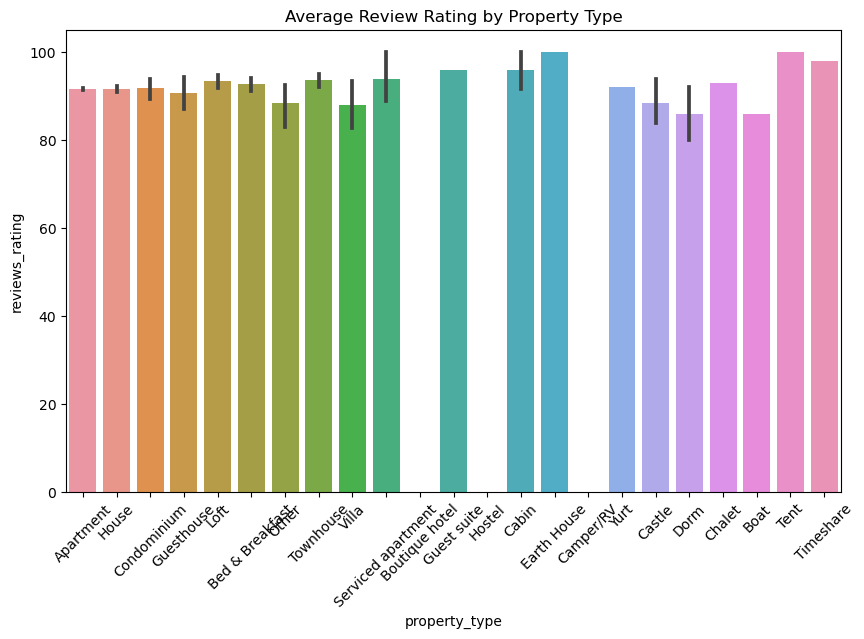

In [7]:
# Average Review Rating by Property Type
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='property_type', y='reviews_rating')
plt.xticks(rotation=45)
plt.title('Average Review Rating by Property Type')
plt.show()

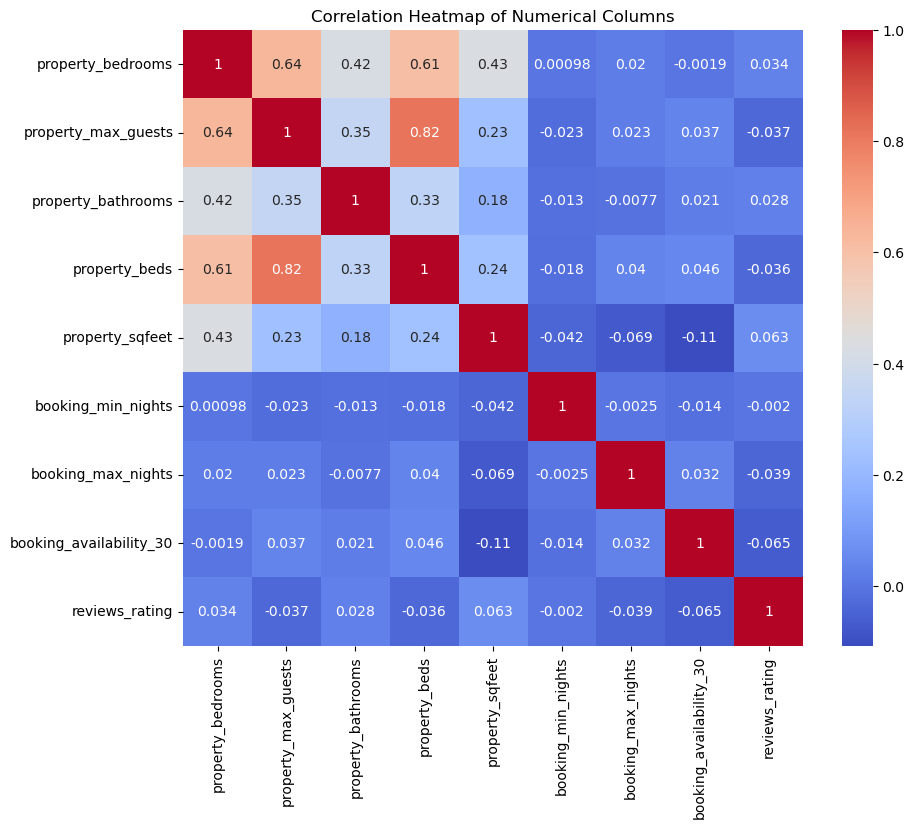

In [8]:
# correlation heatmap of features
num_cols = ['property_bedrooms', 'property_max_guests', 'property_bathrooms',
            'property_beds', 'property_sqfeet', 'booking_min_nights', 'booking_max_nights',
            'booking_availability_30', 'reviews_rating']

plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

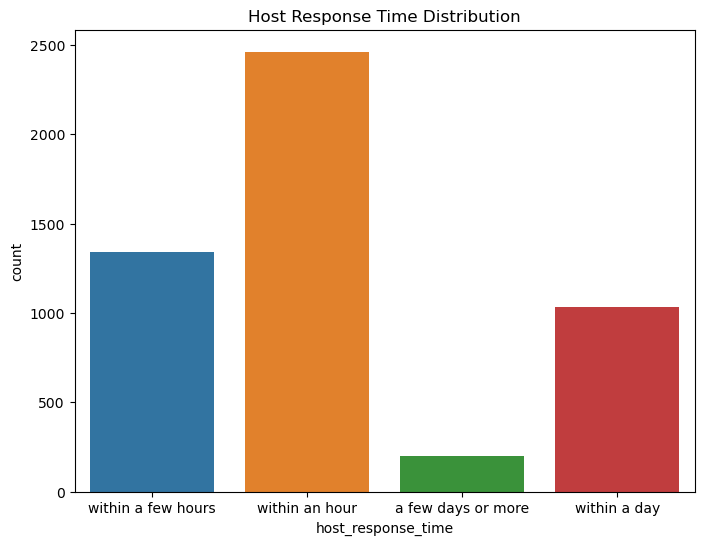

In [9]:
# Host response time distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='host_response_time')
plt.title('Host Response Time Distribution')
plt.show()

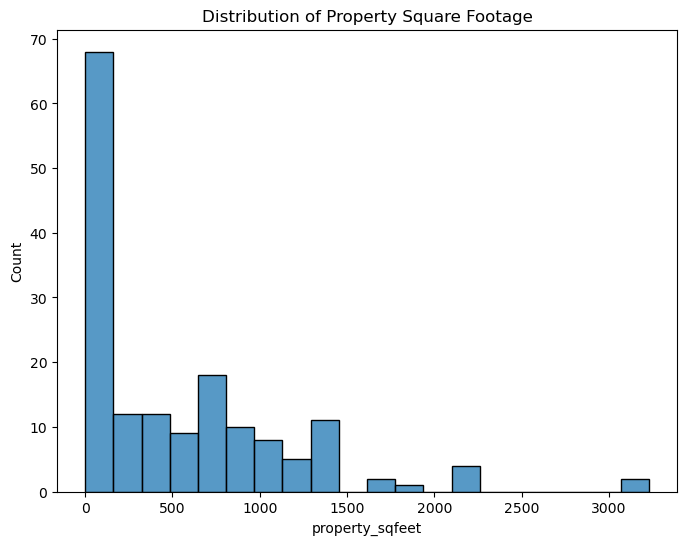

In [10]:
# Distribution of property square footage
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='property_sqfeet', bins=20)
plt.title('Distribution of Property Square Footage')
plt.show()

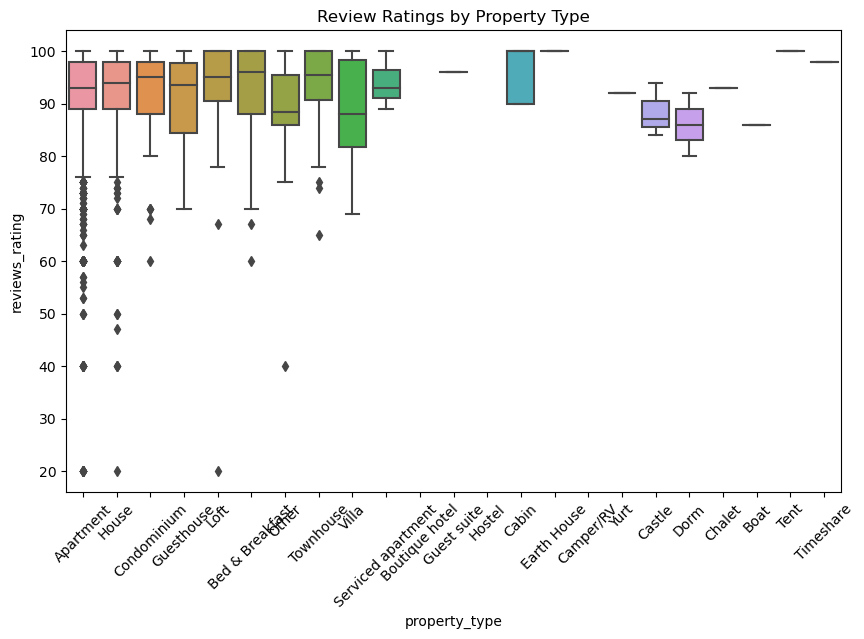

In [11]:
# Box plot of review ratings by property type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='property_type', y='reviews_rating')
plt.xticks(rotation=45)
plt.title('Review Ratings by Property Type')
plt.show()

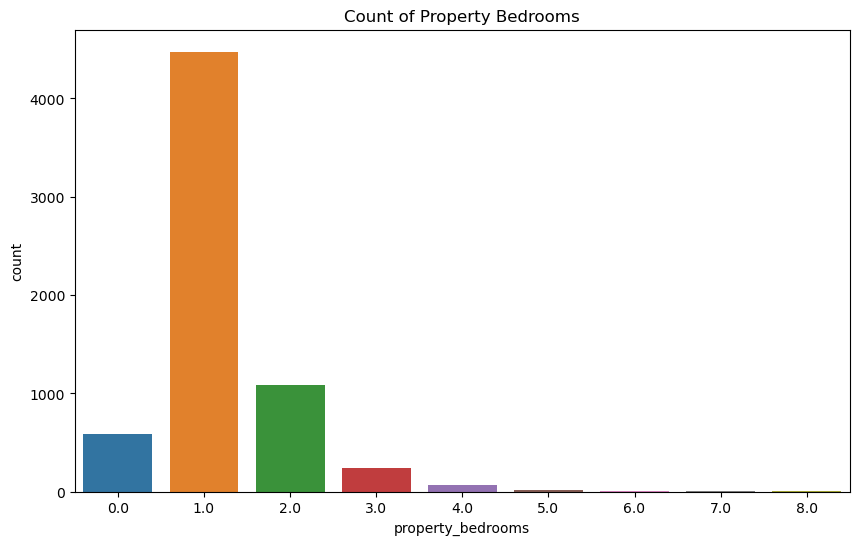

In [12]:
# Count of property bedrooms
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='property_bedrooms')
plt.title('Count of Property Bedrooms')
plt.show()

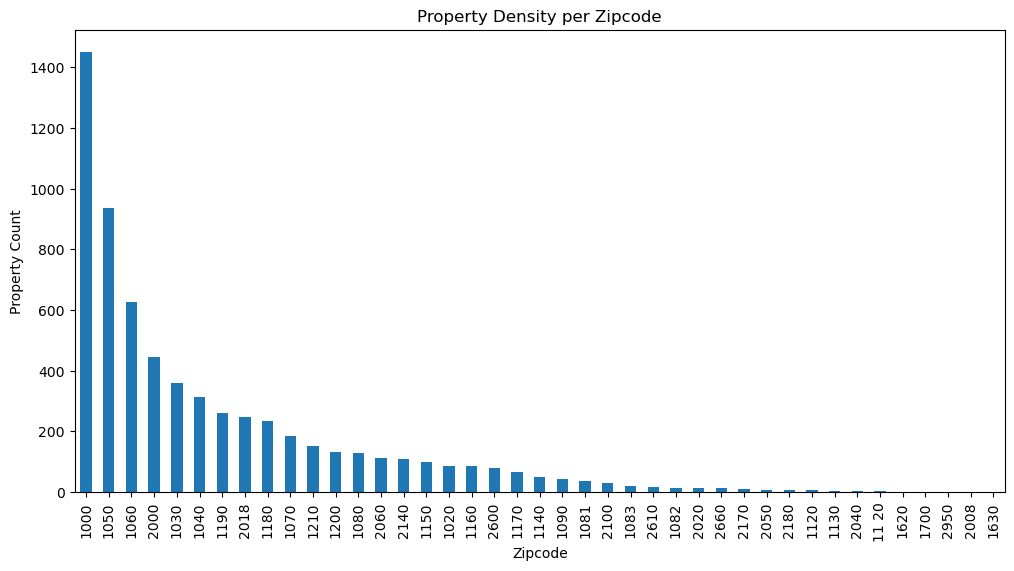

In [13]:
# Property density per zipcode
plt.figure(figsize=(12, 6))
df['property_zipcode'].value_counts().plot(kind='bar')
plt.title('Property Density per Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Property Count')
plt.show()

AttributeError: 'int' object has no attribute 'capitalize'

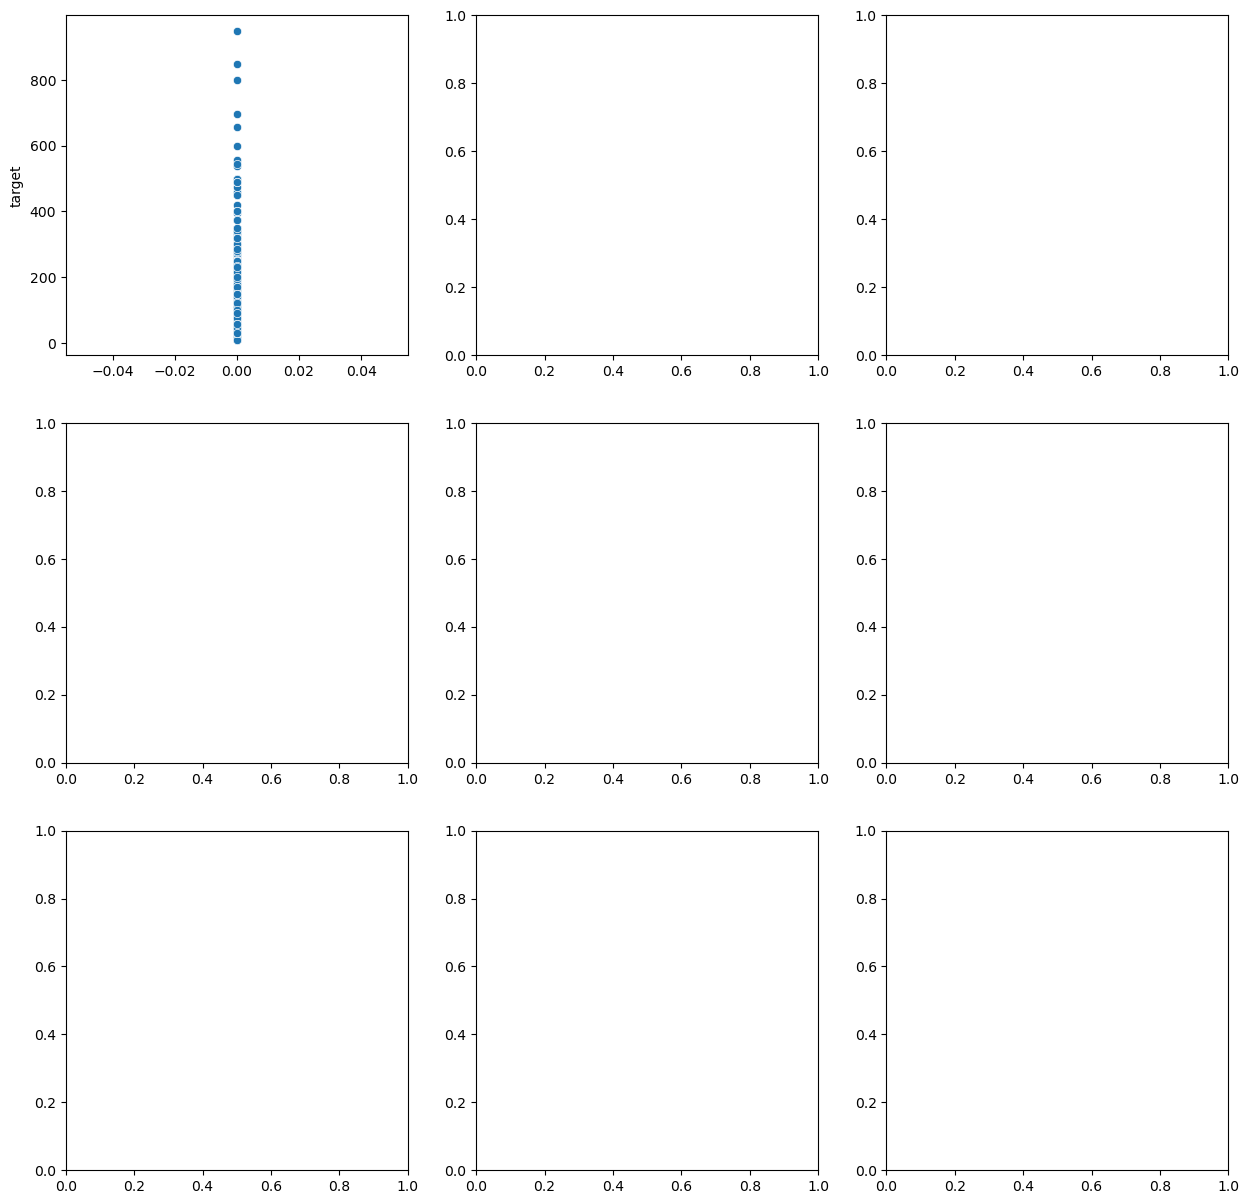

In [14]:
#  Relation of each feature with property price
numeric_cols = ['property_bedrooms', 'property_max_guests', 'property_bathrooms',
                'property_beds', 'property_sqfeet', 'booking_min_nights', 'booking_max_nights',
                'booking_availability_30', 'reviews_rating']

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for i, col in enumerate(numeric_cols):
    row = i // 3
    col = i % 3
    sns.scatterplot(data=df, x=col, y='target', ax=axs[row, col])
    axs[row, col].set_title(f'{col.capitalize()} vs Property Price')
plt.tight_layout()
plt.show()

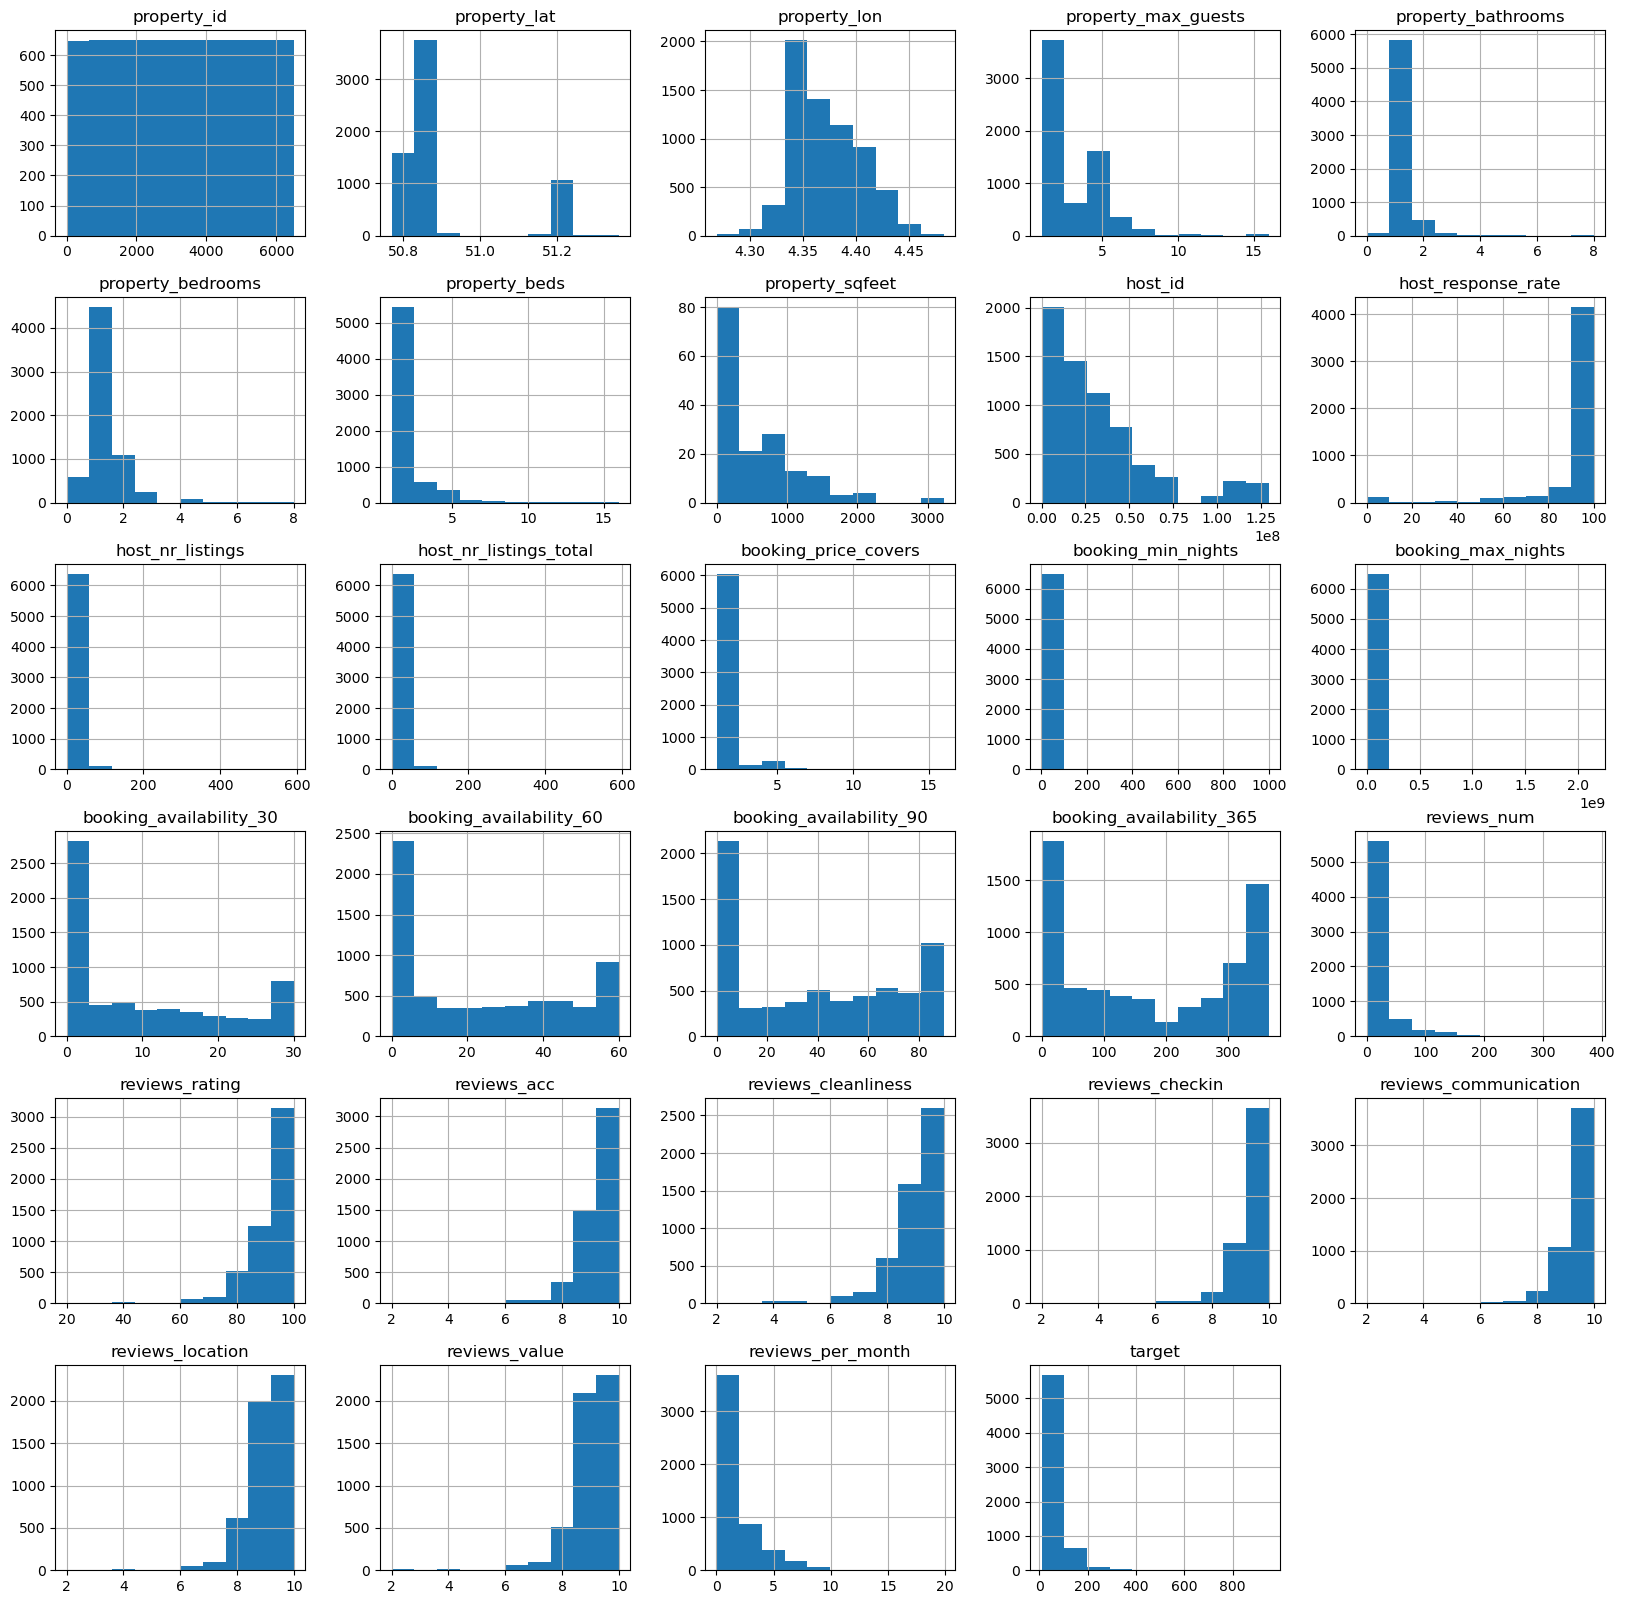

In [15]:
# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20));

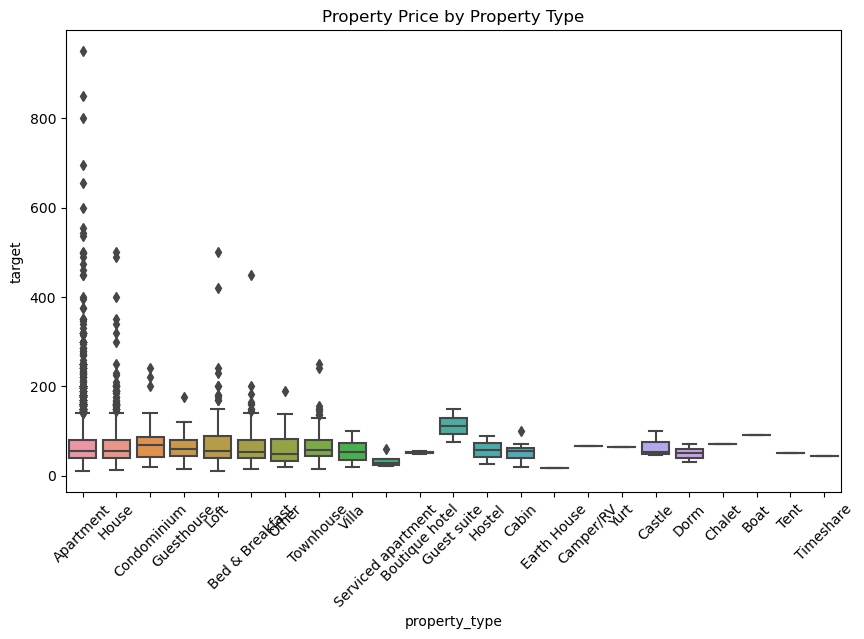

In [16]:
# Box plot of target by property type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='property_type', y='target')
plt.xticks(rotation=45)
plt.title('Property Price by Property Type')
plt.show()

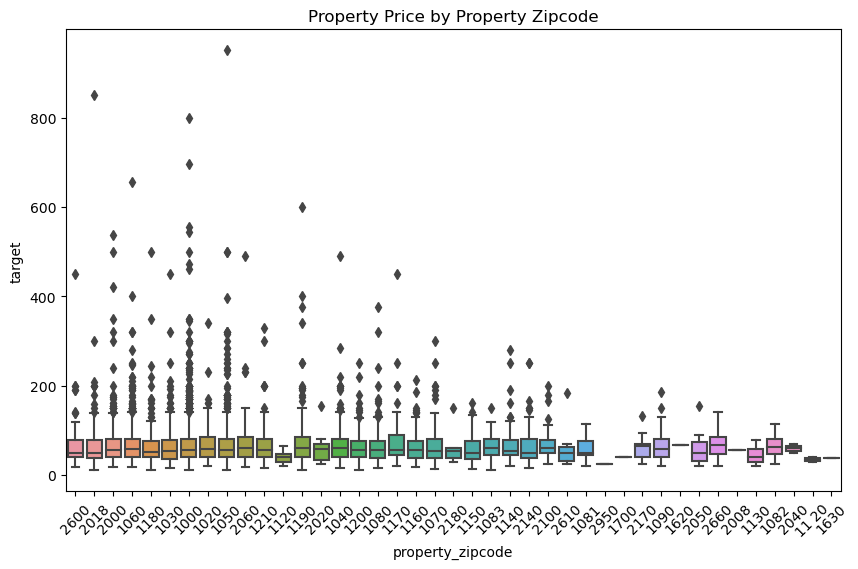

In [17]:
#  Box plot of target by property zipcode
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='property_zipcode', y='target')
plt.xticks(rotation=45)
plt.title('Property Price by Property Zipcode')
plt.show()

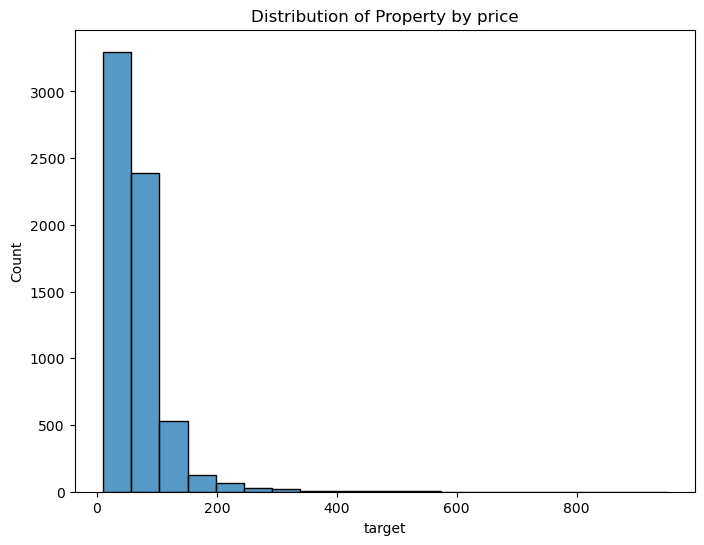

In [18]:
# Distribution of Property by target
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='target', bins=20)
plt.title('Distribution of Property by price')
plt.show()

In [19]:
# -----Preprocessing----


In [20]:
useless=['property_id', 'property_name', 'property_summary', 'property_space',
       'property_desc', 'property_neighborhood', 'property_notes',
       'property_transit', 'property_access', 'property_interaction',
       'property_rules','property_amenities','property_last_updated','host_id', 'host_since','host_about', 'host_response_time',
        'extra']
data.drop(useless,axis=1,inplace =True)
count_data = data.describe().loc['count', ]<600
for i in range(len(count_data)):
        if count_data[i]:
            data.drop(count_data.index[i], axis=1, inplace=True)
            # Focus on postcodes

from collections import Counter

# Get number of zipcodes
nb_counts = Counter(data.property_zipcode)
print("Number of Zipcodes:", len(nb_counts))

# Delete zipcodes with less than 100 entries
for i in list(nb_counts):
    if nb_counts[i] < 20:
        del nb_counts[i]
        data = data[data.property_zipcode != i]

Number of Zipcodes: 42


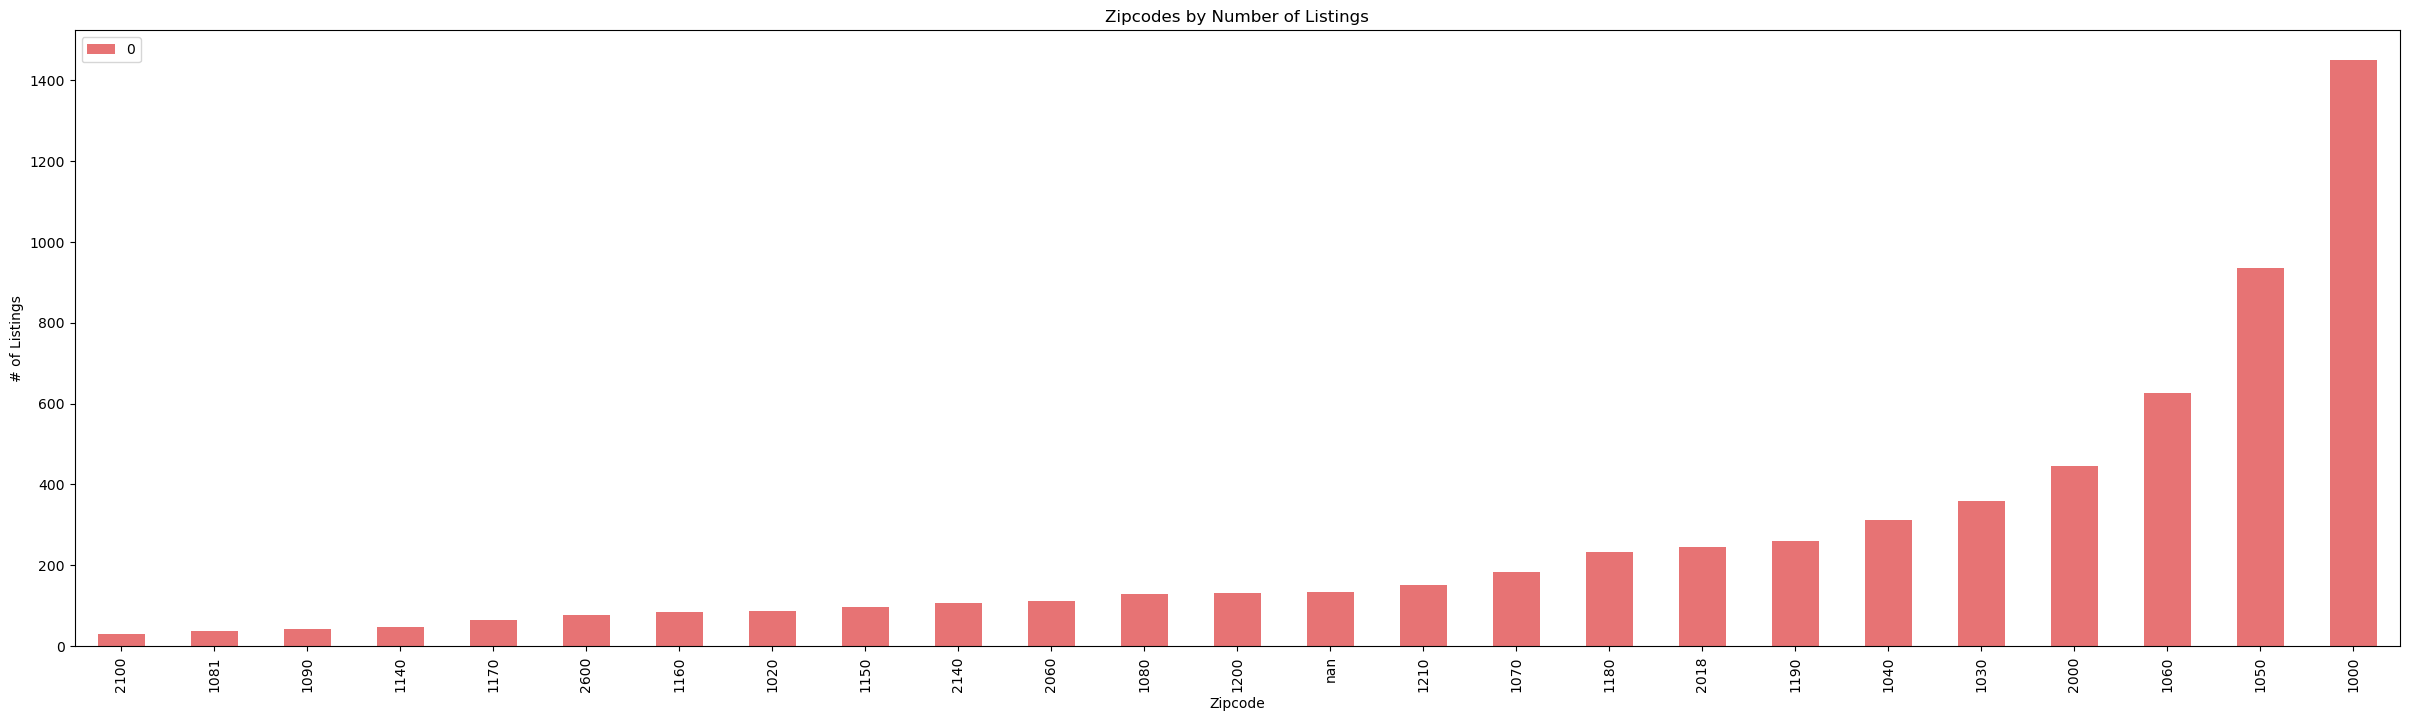

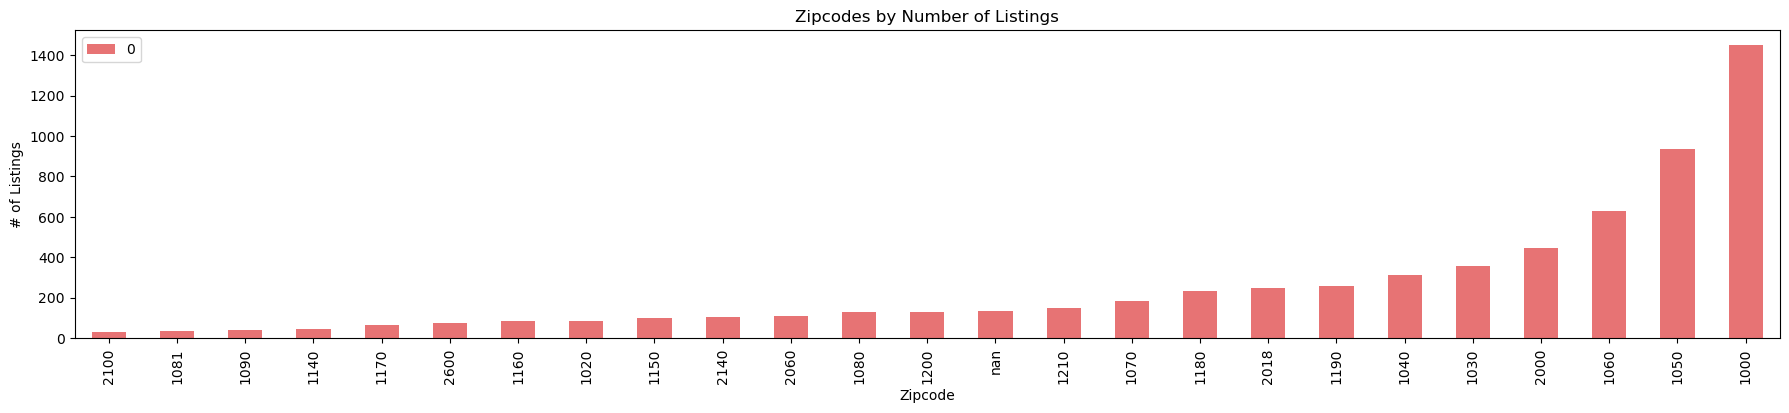

Number of entries removed:  17


In [21]:
import matplotlib.pyplot as plt
import pandas as pd
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
ax = tdf.plot(kind='bar', figsize = (30,8), color = '#E35A5C', alpha = 0.85)
ax.set_title("Zipcodes by Number of Listings")
ax.set_xlabel("Zipcode")
ax.set_ylabel("# of Listings")
plt.show()

# Plot new zipcodes distribution
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
ax = tdf.plot(kind='bar', figsize = (22,4), color = '#E35A5C', alpha = 0.85)
ax.set_title("Zipcodes by Number of Listings")
ax.set_xlabel("Zipcode")
ax.set_ylabel("# of Listings")

plt.show()

print ('Number of entries removed: ', 6400 - data.shape[0])

In [22]:
from sklearn import preprocessing

# Function to label encode categorical variables.
# Input: array (array of values)
# Output: array (array of encoded values)
def encode_categorical(array):
    if not array.dtype == np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array
    
# Temporary dataframe
temp_data = data.copy()
# Delete additional entries with NaN values
temp_data = temp_data.dropna(axis=0)

# Encode categorical data
temp_data = temp_data.apply(encode_categorical)
# Compute matrix of correlation coefficients
corr_matrix = np.corrcoef(temp_data.T)

corr_df = pd.DataFrame(data = corr_matrix, columns = temp_data.columns, 
             index = temp_data.columns)

corr_df

,property_zipcode,property_lat,property_lon,property_type,property_room_type,property_max_guests,property_bathrooms,property_bedrooms,property_beds,property_bed_type,...,reviews_last,reviews_rating,reviews_acc,reviews_cleanliness,reviews_checkin,reviews_communication,reviews_location,reviews_value,reviews_per_month,target
property_zipcode,1.000000,0.733314,0.565922,0.145933,0.041881,-0.018613,0.002229,0.050381,0.032008,0.035259,...,-0.004753,0.018329,-0.004073,0.020891,0.065229,0.056267,-0.119934,0.029486,-0.047270,-0.008963
property_lat,0.733314,1.000000,0.624307,0.107828,-0.051331,0.021042,-0.001830,0.018706,0.039458,0.046082,...,0.065673,0.026283,-0.009856,0.052735,0.048872,0.033868,0.002667,0.027854,0.054779,0.005631
property_lon,0.565922,0.624307,1.000000,0.115342,0.045948,-0.042610,-0.020603,0.005672,0.008336,0.029908,...,-0.007912,0.013168,-0.028286,0.029431,0.033764,0.034898,-0.029019,0.004931,-0.070647,-0.004749
property_type,0.145933,0.107828,0.115342,1.000000,0.227701,0.038846,0.093989,0.111989,0.100214,0.016503,...,0.010118,0.023676,-0.013148,0.012042,0.030516,0.021917,-0.037598,0.020531,0.008496,0.008575
property_room_type,0.041881,-0.051331,0.045948,0.227701,1.000000,-0.354308,-0.030476,-0.161254,-0.216235,-0.059850,...,-0.022314,0.029634,-0.017837,-0.001979,0.016112,0.021757,-0.036187,0.043670,0.041170,-0.009186
property_max_guests,-0.018613,0.021042,-0.042610,0.038846,-0.354308,1.000000,0.396979,0.635316,0.822412,0.073285,...,0.049835,-0.043272,-0.062348,-0.048672,-0.057874,-0.046502,-0.007813,-0.061958,-0.029415,0.008132
property_bathrooms,0.002229,-0.001830,-0.020603,0.093989,-0.030476,0.396979,1.000000,0.461860,0.366931,0.035537,...,-0.002607,0.029884,0.001254,-0.002512,-0.028671,-0.016248,-0.005850,0.011924,-0.057346,-0.010409
property_bedrooms,0.050381,0.018706,0.005672,0.111989,-0.161254,0.635316,0.461860,1.000000,0.595906,0.090839,...,0.003130,0.031876,0.001909,-0.010540,-0.007435,0.002354,-0.024361,0.008053,-0.090768,-0.000491
property_beds,0.032008,0.039458,0.008336,0.100214,-0.216235,0.822412,0.366931,0.595906,1.000000,0.057012,...,0.010774,-0.048658,-0.082719,-0.044854,-0.049400,-0.041690,-0.030485,-0.062287,-0.039098,0.005909
property_bed_type,0.035259,0.046082,0.029908,0.016503,-0.059850,0.073285,0.035537,0.090839,0.057012,1.000000,...,0.006653,0.034006,0.034196,0.044333,0.028525,0.027832,0.024839,0.041108,0.011919,0.018748


In [ ]:
dict ={'1000':'1000','1020':'1000','1030':'1000','1040':'1000','1050':'1000','1060':'1100','1070':'1100','1080':'1100',
      '1090':'1100','1081':'1100','1082':'1100','1083':'1100','1120':'1150','1130':'1150','1140':'1150','1150':'1150',
     '1160':'1200','1170':'1200','1180':'1200','1190':'1200','1200':'1200','1210':'1200','1630':'1600','1620':'1600',
     '1700':'1600','2000':'2000','2008':'2000','2018':'2000','2020':'2000','2040':'2000','2050':'2100','2060':'2100',
     '2100':'2100','2140':'2100','2170':'2100','2180':'2100','2600':'2600','2610':'2600','2660':'2600',
     '2950':'2900','11 20': '1150'  }
def convert_zips_codes(val):
     return dict[val]
    
df['property_zipcode'] = df['property_zipcode'].apply(convert_zips_codes)



In [23]:
#dropping highly correlated variables
useless =['property_lat','property_beds','reviews_acc','reviews_value']
data.drop(useless,axis=1,inplace=True)
useless =['host_verified','reviews_first','reviews_last','host_location']
data.drop(useless,axis=1,inplace=True)

#randomization of data
from sklearn.utils import shuffle
data = shuffle(data)

#one-hot encoding
data = pd.get_dummies(data)

In [24]:
# Extract features and labels
y = data['target']
X = data.drop('target', axis = 1)

# Training and Testing Sets
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)
import numpy as np
train_X = np.array(train_X)
test_X = np.array(test_X)
train_y = np.array(train_y)
test_y = np.array(test_y)
train_X.shape, test_X.shape

((4787, 81), (1596, 81))

In [25]:
#Algorithm 1: Random Forest Regression with hyperparameters
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn.preprocessing import StandardScaler

# Create the pipeline (imputer + scaler + regressor)
my_pipeline_RF = make_pipeline(imputer, StandardScaler(),
                               RandomForestRegressor(random_state=42))

In [26]:
# Fit the model
my_pipeline_RF.fit(train_X, train_y)


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [27]:
#evaluating the model
def evaluate_model(model, predict_set, evaluate_set):
    predictions = model.predict(predict_set)
    print(predictions)
    from sklearn.metrics import median_absolute_error
    print("Median Absolute Error: " + str(round(median_absolute_error(predictions, evaluate_set), 2))) 
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    RMSE = round(sqrt(mean_squared_error(predictions, evaluate_set)), 2)
    print("RMSE: " + str(RMSE)) 
    
result_RF_test = evaluate_model(my_pipeline_RF, test_X, test_y)
result_RF_train = evaluate_model(my_pipeline_RF, train_X, train_y)

[ 57.61 110.14  59.03 ...  63.45  57.96  84.46]
Median Absolute Error: 26.19
RMSE: 51.1
[ 61.93  72.17  50.53 ...  44.53 182.5   72.7 ]
Median Absolute Error: 9.46
RMSE: 21.01


In [28]:
# -----Tuning random forest algorithm-----

# Get numerical feature importances
importances = list(my_pipeline_RF.steps[2][1].feature_importances_)
# List of tuples with variable and importance
feature_list = list(data.columns.drop("target"))
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[0:22]]

# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]

# Cumulative importances
cumulative_importances = sum(sorted_importances)

print(cumulative_importances)


from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently used:\n')
pprint(my_pipeline_RF.get_params())

import numpy as np

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 11)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'randomforestregressor__n_estimators': n_estimators,
               'randomforestregressor__max_depth': max_depth,
               'randomforestregressor__min_samples_split': min_samples_split,
               'randomforestregressor__min_samples_leaf': min_samples_leaf,
               'randomforestregressor__bootstrap': bootstrap}

from pprint import pprint
pprint(random_grid)

from sklearn.model_selection import RandomizedSearchCV

# Random search of parameters, using 2 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = my_pipeline_RF, 
                               param_distributions = random_grid, 
                               n_iter = 50, cv = 2, verbose=2,
                               random_state = 42, n_jobs = -1, 
                               scoring = 'neg_median_absolute_error')

# Fit our model
rf_random.fit(train_X, train_y)
rf_random.best_params_

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'randomforestregressor__bootstrap': [True],
    'randomforestregressor__max_depth': [80, 85, 90], 
    'randomforestregressor__min_samples_leaf': [1],
    'randomforestregressor__min_samples_split': [2, 4],
    'randomforestregressor__n_estimators': [780, 800, 820] 
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = my_pipeline_RF, 
                           param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2, 
                           scoring = 'neg_median_absolute_error')

grid_search.fit(train_X, train_y)

grid_search.best_params_


Variable: property_lon         Importance: 0.12
Variable: reviews_per_month    Importance: 0.1
Variable: booking_availability_365 Importance: 0.07
Variable: reviews_num          Importance: 0.06
Variable: booking_min_nights   Importance: 0.04
Variable: booking_availability_60 Importance: 0.04
Variable: booking_availability_90 Importance: 0.04
Variable: reviews_rating       Importance: 0.04
Variable: property_max_guests  Importance: 0.03
Variable: property_bedrooms    Importance: 0.03
Variable: host_response_rate   Importance: 0.03
Variable: booking_max_nights   Importance: 0.03
Variable: booking_availability_30 Importance: 0.03
Variable: property_bathrooms   Importance: 0.02
Variable: host_nr_listings     Importance: 0.02
Variable: host_nr_listings_total Importance: 0.02
Variable: booking_price_covers Importance: 0.02
Variable: reviews_cleanliness  Importance: 0.02
Variable: reviews_communication Importance: 0.02
Variable: reviews_location     Importance: 0.02
Variable: reviews_checkin

{'randomforestregressor__bootstrap': True,
 'randomforestregressor__max_depth': 80,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 4,
 'randomforestregressor__n_estimators': 800}

In [29]:
#model building and evaluation of tunned RF
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Create the pipeline (imputer + scaler + regressor)
my_pipeline_RF_grid = make_pipeline(imputer, StandardScaler(),
                                      RandomForestRegressor(random_state=42,
                                                            bootstrap = True,
                                                            max_depth = 80,
                                                            max_features = 'auto',
                                                            min_samples_leaf = 1,
                                                            min_samples_split = 2,
                                                            n_estimators = 820))

# Fit the model
my_pipeline_RF_grid.fit(train_X, train_y)
result_RF_tuned_test = evaluate_model(my_pipeline_RF_grid, test_X, test_y)
result_RF_tuned_test

/Users/riyagoyal/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[55.25853659 96.94756098 55.44512195 ... 60.67439024 64.58292683
 79.44390244]
Median Absolute Error: 26.14
RMSE: 51.0


In [30]:
#Algorithm 2: Gradient Boosting
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn.preprocessing import StandardScaler

# Create the pipeline: Imputation + Scale + MLP regressor
my_pipeline_XGB = make_pipeline(imputer, StandardScaler(), 
                                XGBRegressor(random_state = 42))

# Fit the model
my_pipeline_XGB.fit(train_X, train_y)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
result_XGB_test = evaluate_model(my_pipeline_XGB, test_X, test_y)
result_XGB_train = evaluate_model(my_pipeline_XGB, train_X, train_y)

In [ ]:
# ------Tuning XGB-----

from pprint import pprint
# Look at parameters used by our current model
print('Parameters currently used:\n')
pprint(my_pipeline_XGB.get_params())

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {'xgbregressor__learning_rate': [0.1, 0.05], 
              'xgbregressor__max_depth': [5, 7, 9],
              'xgbregressor__n_estimators': [100, 500, 900]}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = my_pipeline_XGB,
                           param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2, 
                           scoring = 'neg_median_absolute_error')


In [ ]:
# Fitting Tuned XGB model
grid_search.fit(train_X, train_y)

In [ ]:
# finding best params
grid_search.best_params_

In [ ]:
# Running and evaluating Tuned XGB
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
# Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Create the pipeline: Imputation + Scale + MLP regressor
my_pipeline_XGB_grid = make_pipeline(imputer, StandardScaler(), 
                                     XGBRegressor(random_state = 42,
                                                  learning_rate = 0.05,
                                                  max_depth = 9,
                                                  n_estimators = 900))

# Fit the model
my_pipeline_XGB_grid.fit(train_X, train_y)

In [ ]:
result_XGB_tuned_test = evaluate_model(my_pipeline_XGB_grid, test_X, test_y)

In [ ]:
# ------ Algorithm 3: Neural Network-------


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data
from sklearn.preprocessing import StandardScaler
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Create the pipeline: Imputation + Scale + Feature Selection + MLP regressor
my_pipeline_NN = make_pipeline(imputer, StandardScaler(), 
                               MLPRegressor(random_state = 42,
                                            max_iter = 3000))

# Fit the model
my_pipeline_NN.fit(train_X, train_y)

In [32]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Create the pipeline: imputation + MLP regressor
my_pipeline_NN_grid = make_pipeline(imputer, StandardScaler(),
                                    MLPRegressor(hidden_layer_sizes = (100, 100, 100),
                                                 activation = 'logistic',
                                                 early_stopping = False,
                                                 learning_rate_init = 0.0001,
                                                 solver = 'sgd',
                                                 max_iter = 500,
                                                 random_state = 42))

In [33]:
# Fit the model
my_pipeline_NN_grid.fit(train_X, train_y)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(activation='logistic',
                              hidden_layer_sizes=(100, 100, 100),
                              learning_rate_init=0.0001, max_iter=500,
                              random_state=42, solver='sgd'))])

In [35]:
result_NN_tuned = evaluate_model(my_pipeline_NN_grid, test_X, test_y)

[68.63077907 68.67155414 68.64567055 ... 68.59036272 68.40252738
 68.65696402]
Median Absolute Error: 23.61
RMSE: 49.4


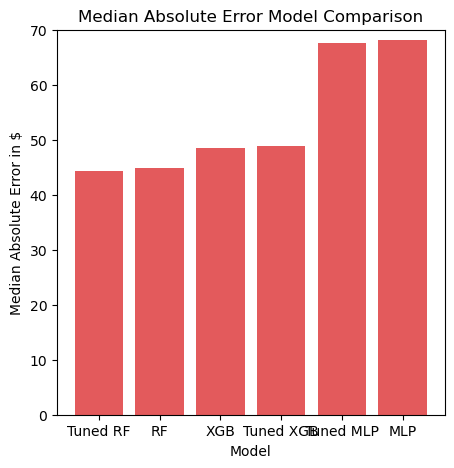

[CV] END randomforestregressor__bootstrap=True, randomforestregressor__max_depth=85, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=10, randomforestregressor__n_estimators=10; total time=   0.9s
[CV] END randomforestregressor__bootstrap=False, randomforestregressor__max_depth=85, randomforestregressor__min_samples_leaf=2, randomforestregressor__min_samples_split=5, randomforestregressor__n_estimators=109; total time=   4.4s
[CV] END randomforestregressor__bootstrap=False, randomforestregressor__max_depth=110, randomforestregressor__min_samples_leaf=2, randomforestregressor__min_samples_split=10, randomforestregressor__n_estimators=505; total time=  20.0s
[CV] END randomforestregressor__bootstrap=False, randomforestregressor__max_depth=10, randomforestregressor__min_samples_leaf=4, randomforestregressor__min_samples_split=10, randomforestregressor__n_estimators=10; total time=   0.2s
[CV] END randomforestregressor__bootstrap=False, randomforestregres

In [36]:
# visualization of all models RMSE values
import numpy as np
labels = np.array(['RF','Tuned RF','XGB', 'Tuned XGB', 'MLP', 'Tuned MLP'])
error_val = np.array([44.78, 44.38, 48.49, 48.88, 68.2, 67.52])

# Arrange bars
pos = np.arange(error_val.shape[0])
srt = np.argsort(error_val)

# Plots Mean Absolute Variance bars across functions
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.bar(pos, error_val[srt], align = 'center', color='#E35A5C')
plt.xticks(pos, labels[srt])
plt.xlabel('Model')
plt.ylabel('Median Absolute Error in $')
plt.title('Median Absolute Error Model Comparison')
plt.ylim(0,70)
plt.show()

In [37]:
# predicting prcies for the test set
os.getcwd()
main_file_path1 = 'test.csv' 
test_data = pd.read_csv(main_file_path1,low_memory = False)
test_data_dummy = pd.read_csv(main_file_path1,low_memory = False)
useless =['property_id', 'property_name', 'property_summary', 'property_space',
       'property_desc', 'property_neighborhood', 'property_notes',
       'property_transit', 'property_access', 'property_interaction',
       'property_rules','property_beds','property_lat','property_amenities', 'property_sqfeet','property_last_updated', 'host_id', 'host_since',
       'host_location', 'host_about', 'host_response_time','host_verified','reviews_first', 'reviews_last','reviews_acc','reviews_value','extra']
test_data.drop(useless, axis =1, inplace= True)
print(test_data.dtypes)
test_data['property_zipcode'] = test_data['property_zipcode'].astype(str)
print(test_data.dtypes)
print(test_data.columns)
print(test_data_dummy.columns)

property_zipcode            float64
property_lon                float64
property_type                object
property_room_type           object
property_max_guests           int64
property_bathrooms          float64
property_bedrooms             int64
property_bed_type            object
property_scraped_at          object
host_response_rate          float64
host_nr_listings              int64
host_nr_listings_total        int64
booking_price_covers          int64
booking_min_nights            int64
booking_max_nights            int64
booking_availability_30       int64
booking_availability_60       int64
booking_availability_90       int64
booking_availability_365      int64
booking_cancel_policy        object
reviews_num                   int64
reviews_rating              float64
reviews_cleanliness         float64
reviews_checkin             float64
reviews_communication       float64
reviews_location            float64
reviews_per_month           float64
dtype: object
property_zipco

In [38]:
test_data = pd.get_dummies(test_data)
print(test_data.columns)

Index(['property_lon', 'property_max_guests', 'property_bathrooms',
       'property_bedrooms', 'host_response_rate', 'host_nr_listings',
       'host_nr_listings_total', 'booking_price_covers', 'booking_min_nights',
       'booking_max_nights', 'booking_availability_30',
       'booking_availability_60', 'booking_availability_90',
       'booking_availability_365', 'reviews_num', 'reviews_rating',
       'reviews_cleanliness', 'reviews_checkin', 'reviews_communication',
       'reviews_location', 'reviews_per_month', 'property_zipcode_1000.0',
       'property_zipcode_1020.0', 'property_zipcode_1030.0',
       'property_zipcode_1040.0', 'property_zipcode_1050.0',
       'property_zipcode_1060.0', 'property_zipcode_1070.0',
       'property_zipcode_1080.0', 'property_zipcode_1081.0',
       'property_zipcode_1082.0', 'property_zipcode_1090.0',
       'property_zipcode_1120.0', 'property_zipcode_1140.0',
       'property_zipcode_1150.0', 'property_zipcode_1160.0',
       'property_zipco

In [ ]:
test_data['property_zipcode'] = test_data['property_zipcode'].apply(convert_zips_codes)

In [ ]:
test_z = np.array(test_data)
test_z.shape

test_data = pd.get_dummies(test_data)
print(test_data.columns)

In [ ]:
# Writing the output in file
prediction = []
def predict_model(model, predict_set):
    predictions = model.predict(predict_set)
    print(test_data_dummy['property_id'])
    print(predictions)
    return predictions
result_on_test_data = predict_model(my_pipeline_RF_grid, test_z)
bins = test_data_dummy['property_id']

f = open("output_clustering.csv", "w")

for i in range(len(bins)):
    f.write("{},{}\n".format(bins[i], result_on_test_data[i]))

f.close()
os.getcwd()